In [83]:
#Importing Libreries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#CLEAN UP
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

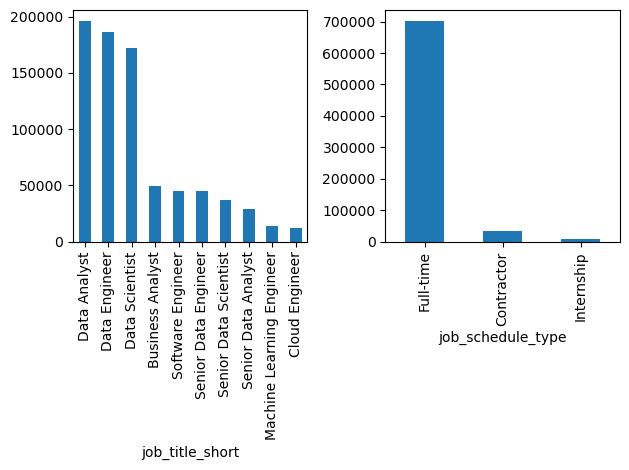

In [84]:
fig, ax = plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind='bar', ax= ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[1])

fig.tight_layout()

In [85]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby (['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [86]:
job_titles = ['Data Scientist','Data Engineer','Data Analyst']

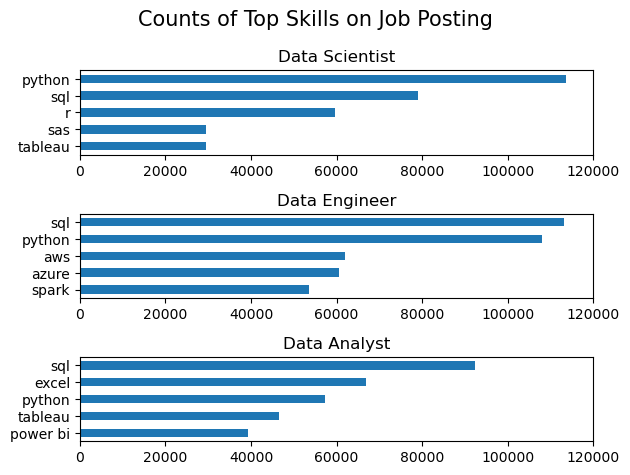

In [87]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)


fig.suptitle('Counts of Top Skills on Job Posting',fontsize=15)
fig.tight_layout()

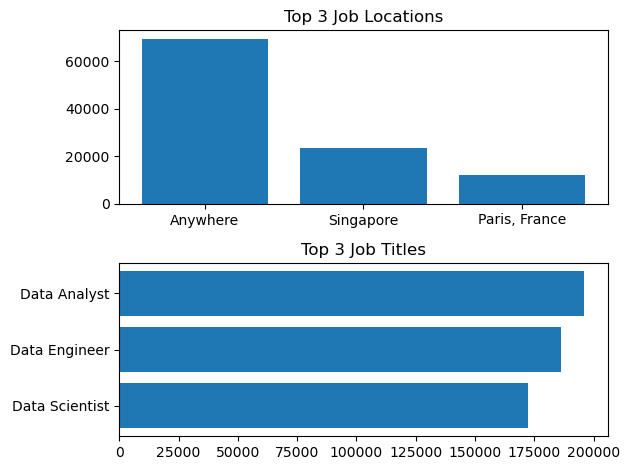

In [88]:
# Create a subplot with 2 rows and 1 column:
# In the first subplot, plot a bar chart of the top 3 job locations by the number of job postings.
# In the second subplot, plot a horizontal bar chart of the top 3 job titles by the number of job postings.
# Use tight_layout() to adjust the spacing between subplots.

fig, ax = plt.subplots(2, 1)

# Top 3 job locations
job_locations = df['job_location'].value_counts().head(3)
ax[0].bar(job_locations.index, job_locations.values)
ax[0].set_title('Top 3 Job Locations')

# Top 3 job titles
job_titles = df['job_title_short'].value_counts().head(3)
ax[1].barh(job_titles.index, job_titles.values)
ax[1].set_title('Top 3 Job Titles')
ax[1].invert_yaxis()

fig.tight_layout()
plt.show()

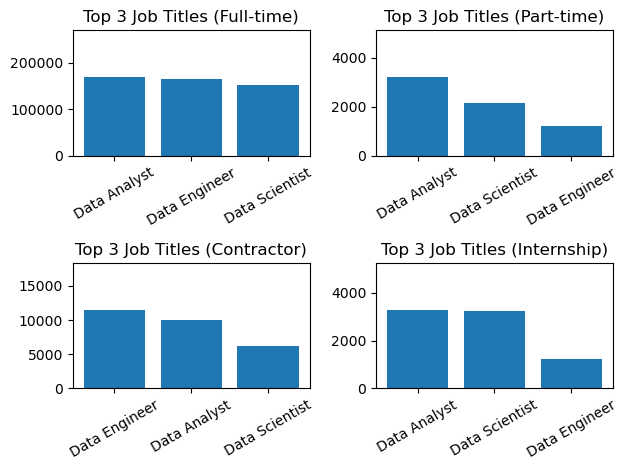

In [112]:
# Create a subplot with 2 rows and 2 columns:
# In each subplot, plot a bar chart of the top 3 job titles by the number of job postings 
# for each job schedule type (Full-time, Part-time, Contractor, and Internship).
# Use fig.tight_layout() to adjust the spacing between subplots.

#SCHEDULE TYPE 

df_schedule = df.copy()
df_schedule = df_schedule.explode('job_schedule_type')
df_schedule_count = (df_schedule
    .groupby(['job_schedule_type', 'job_title_short'])
    .size()
    .reset_index(name='schedule_count')
    .sort_values(by='schedule_count', ascending=False)
)

schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

#PLOT
fig, ax = plt.subplots(2, 2)

for i, job_schedule in enumerate(schedules):

    # filtrar por tipo de jornada
    df_plot1 = (df_schedule_count[df_schedule_count['job_schedule_type'] == job_schedule].head(3))

    # posición del subplot
    row = i // 2
    col = i % 2

    ax[row, col].bar(df_plot1['job_title_short'],df_plot1['schedule_count'])
    ax[row, col].set_title(f'Top 3 Job Titles ({job_schedule})')
    ax[row, col].set_ylabel('')
    ax[row, col].tick_params(axis='x', labelrotation=30)
    max_value = df_plot1['schedule_count'].max()
    ax[row, col].set_ylim(0, max_value * 1.6)

fig.tight_layout()
plt.show()

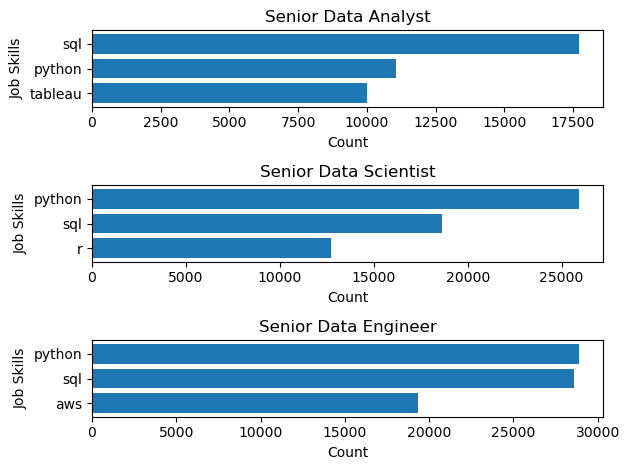

In [ ]:
# Create a subplot with 3 rows and 1 column
# In each subplot, plot a horizontal bar chart of the top 3 job skills by the number of job postings for each job title 
# (Senior Data Scientist, Senior Data Engineer, and Senior Data Analyst).

df_skills = df.explode('job_skills')
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
fig, ax = plt.subplots(len(job_roles), 1)

for i, role in enumerate(job_roles):
    role_skills = df_skills[df_skills['job_title_short'] == role]['job_skills'].value_counts().head(3)
    ax[i].barh(role_skills.index, role_skills.values)
    ax[i].set_title(role)
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Job Skills')
    ax[i].invert_yaxis()


fig.tight_layout()
plt.show()